## Frog prediction - Data Mining - Exam - CBS


### Environment setup


In [1]:
import warnings
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pystac_client

warnings.filterwarnings("ignore", "invalid value", RuntimeWarning)

## Accessing GBIF data 

In [2]:
AUSSIE = pd.read_csv('../Data/GBIF/occurrence.txt', sep='\t',usecols=['countryCode','eventDate','year','month','decimalLatitude','decimalLongitude','occurrenceStatus',"stateProvince","phylum"])

In [3]:
AUSSIE

,occurrenceStatus,eventDate,year,month,countryCode,stateProvince,decimalLatitude,decimalLongitude,phylum
0,PRESENT,2020-09-01T00:00:00,2020,9.0,AU,Victoria,-36.200000,146.900000,Chordata
1,PRESENT,2018-06-29T00:00:00,2018,6.0,AU,Queensland,-16.829579,145.637699,Chordata
2,PRESENT,2020-02-22T00:00:00,2020,2.0,AU,Queensland,-27.477243,153.116288,Chordata
3,PRESENT,2020-02-02T00:00:00,2020,2.0,AU,Northern Territory,-23.773407,133.857931,Chordata
4,PRESENT,2020-10-20T00:00:00,2020,10.0,AU,Australian Capital Territory,-35.341157,149.231623,Chordata
...,...,...,...,...,...,...,...,...,...
271684,PRESENT,2020-04-18T00:00:00,2020,4.0,AU,New South Wales,-36.000000,147.000000,Chordata
271685,PRESENT,2020-08-12T00:00:00,2020,8.0,AU,Victoria,-36.702300,144.247000,Chordata
271686,PRESENT,2019-11-10T00:00:00,2019,11.0,AU,New South Wales,-30.339600,149.756000,Chordata
271687,PRESENT,2019-10-09T00:00:00,2019,10.0,AU,New South Wales,-33.082956,151.355480,Chordata


In [4]:
GLOB = pd.read_csv('../Data/GBIF/world_frog.csv', sep='\t',usecols=['countryCode','eventDate','year','month','decimalLatitude','decimalLongitude','occurrenceStatus',"stateProvince","phylum"])

In [5]:
GLOB

,phylum,countryCode,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,month,year
0,Chordata,US,Oklahoma,PRESENT,35.587118,-97.606474,2017-04-15T14:49:47,4,2017
1,Chordata,US,Wisconsin,PRESENT,43.259175,-87.973892,2018-07-31T09:02:28,7,2018
2,Chordata,US,Maryland,PRESENT,39.176445,-76.640768,2019-07-19T21:09:23,7,2019
3,Chordata,US,Washington,PRESENT,45.726563,-122.749135,2020-03-21T15:32:00,3,2020
4,Chordata,US,Texas,PRESENT,32.958467,-96.694169,2020-05-17T21:14:52,5,2020
...,...,...,...,...,...,...,...,...,...
189698,Chordata,CA,British Columbia,PRESENT,49.935563,-124.497514,2017-08-10T16:08:35,8,2017
189699,Chordata,IT,Lombardia,PRESENT,45.029460,10.508441,2019-10-13T10:41:00,10,2019
189700,Chordata,CA,Québec,PRESENT,47.346050,-79.393622,2020-08-02T14:22:48,8,2020
189701,Chordata,US,Maine,PRESENT,44.677924,-70.147150,2020-10-20T14:27:16,10,2020


In [6]:
CA = GLOB[GLOB['countryCode']=='CA']
CR = GLOB[GLOB['countryCode']=='CR']
IT = GLOB[GLOB['countryCode']=="IT"]
ZA = GLOB[GLOB['countryCode']=="ZA"]
US = GLOB[GLOB['countryCode']=='US']

In [7]:
US

,phylum,countryCode,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,month,year
0,Chordata,US,Oklahoma,PRESENT,35.587118,-97.606474,2017-04-15T14:49:47,4,2017
1,Chordata,US,Wisconsin,PRESENT,43.259175,-87.973892,2018-07-31T09:02:28,7,2018
2,Chordata,US,Maryland,PRESENT,39.176445,-76.640768,2019-07-19T21:09:23,7,2019
3,Chordata,US,Washington,PRESENT,45.726563,-122.749135,2020-03-21T15:32:00,3,2020
4,Chordata,US,Texas,PRESENT,32.958467,-96.694169,2020-05-17T21:14:52,5,2020
...,...,...,...,...,...,...,...,...,...
189695,Chordata,US,Ohio,PRESENT,41.309627,-81.604026,2017-01-21T20:54:29,1,2017
189696,Chordata,US,Oklahoma,PRESENT,36.210728,-97.097900,2018-10-17T16:21:45,10,2018
189697,Chordata,US,California,PRESENT,33.093366,-116.817415,2019-04-28T21:24:00,4,2019
189701,Chordata,US,Maine,PRESENT,44.677924,-70.147150,2020-10-20T14:27:16,10,2020


### Data access

# Terra Climate Data

[TerraClimate](http://www.climatologylab.org/terraclimate.html) is a dataset of monthly climate and climatic water balance for global terrestrial surfaces from 1958-2019. 


In [8]:
import pystac

url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate" # url to the collection
collection = pystac.read_file(url) # read the collection
collection 

<Collection id=terraclimate>

# Assigning assets from collection 


In [9]:
asset = collection.assets["zarr-https"] # zarr-https is the asset name
asset

<Asset href=https://cpdataeuwest.blob.core.windows.net/cpdata/raw/terraclimate/4000m/raster.zarr>

import fsspec
import xarray as xr

store = fsspec.get_mapper(asset.href)
ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
ds

In [10]:
import fsspec
import xarray as xr

store = fsspec.get_mapper(asset.href) # get the store
ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"]) # open the zarr
ds

,Array,Chunk
Bytes,103.45 GiB,94.92 MiB
Shape,"(744, 4320, 8640)","(12, 1440, 1440)"
Count,1117 Tasks,1116 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,103.45 GiB,94.92 MiB
Shape,"(744, 4320, 8640)","(12, 1440, 1440)"
Count,1117 Tasks,1116 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


# Assigning grids to Australia

In [44]:
 from tqdm import tqdm 
def loop_for_grid(grid,frogs_filt):
    filt_lat = {} #dictionary for filtered latitude
    i=1
    for _,aus_grid in tqdm(enumerate(grid)):  #tqdm provides us with a progress bar for the loop, as it takes approx 18 minutes to run. 
        longi_lati_df_rang = frogs_filt[((frogs_filt['decimalLongitude'] >= aus_grid["min_x"]) & (frogs_filt['decimalLongitude'] <= aus_grid["max_x"])) & 
                               ((frogs_filt['decimalLatitude'] >= aus_grid["min_y"]) & (frogs_filt['decimalLatitude'] <=aus_grid["max_y"]))]
        if longi_lati_df_rang.shape[0]>0: #we are excluding everything that does not contain frogs.
            filt_lat[i] ={} #dictionary for filtered latitude
            filt_lat[i]["coord"] = aus_grid #coordinates
            filt_lat[i]["frog_count"] = longi_lati_df_rang.shape[0] #number of frogs
            i=i+1
    whole_filt_cord = filt_lat #setting filtered coordinates to aus_whole_filt_cord
    return whole_filt_cord

In [45]:
from tqdm import tqdm 
def loop_for_merge(climate_df, whole_filt_cord_df):
    for ind,row in tqdm(whole_filt_cord_df.iterrows()): #iterating through dataframe


        longi_lati_df_rang = climate_df[(climate_df['decimalLongitude'] >= row["min_lon"]) & (climate_df['decimalLongitude'] <= row["max_lon"]) & #filtering longitude and latitude
                               (climate_df['decimalLatitude'] >= row["min_lat"]) & (climate_df['decimalLatitude'] <=row["max_lat"])] #filtering longitude and latitude


        col = [{var:longi_lati_df_rang[var].mean()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]] #calculating mean of all columns

        for var in col: #iterating through columns
            for key,val in var.items(): #iterating through dictionary
    #             print(key,val)
                whole_filt_cord_df.loc[ind,key] = val #adding the terraclimate variable to frogs dataframe. 

        whole_filt_cord_df.loc[ind,"samples_count"] = longi_lati_df_rang.shape[0] #adding samples count to dataframe
    df_merged = whole_filt_cord_df.copy()
    return df_merged

In [75]:
def create_grid(climate_data,parent_grid,step_lat,step_long,rounded,frog_df):
    weather_df = climate_data.to_dataframe().reset_index().drop_duplicates().reset_index() #Since Xarray is formed with groupby, we need to reset index
    #print(weather_df)
    weather_df = weather_df.dropna() # Drop the NaN values
    #renaming df for merging purposes
    weather_df=weather_df.rename(columns = {'lon':'decimalLongitude'}) 
    weather_df=weather_df.rename(columns = {'lat':'decimalLatitude'})
    weather_df=weather_df.rename(columns = {'time':'eventdate'})
    aus_grid_whole = [({"min_x":np.round(x,rounded), "min_y":np.round(y,rounded), "max_x":np.round(x+step_long ,rounded), #dictionary for whole grid
                     "max_y":np.round(y+step_lat,rounded)}) for x, y in itertools.product(np.arange(parent_grid["min_longi"], parent_grid["max_longi"],step_long), #x and y values
                                                                                   np.arange(parent_grid["min_lati"], parent_grid["max_lati"],step_lat))] #arange for whole grid
    
    #frog df
    data_frog_df = frog_df
    aus_whole_filt_cord = loop_for_grid(aus_grid_whole,data_frog_df)
    
    # Converting the frog_id dictionary to dataframe having 2660 rows & 6 columns
    aus_whole_filt_cord_df = pd.DataFrame.from_dict(aus_whole_filt_cord,orient="index") #converting dictionary to dataframe

    aus_whole_filt_cord_df["min_lon"] = [i["min_x"] for i in aus_whole_filt_cord_df["coord"]] #adding min_lon to dataframe
    aus_whole_filt_cord_df["min_lat"] = [i["min_y"] for i in aus_whole_filt_cord_df["coord"]] # adding min_lat to dataframe
    aus_whole_filt_cord_df["max_lon"] = [i["max_x"] for i in aus_whole_filt_cord_df["coord"]] #adding max_lon to dataframe
    aus_whole_filt_cord_df["max_lat"] = [i["max_y"] for i in aus_whole_filt_cord_df["coord"]]# adding max_lat to dataframe
    
    final = loop_for_merge(weather_df,aus_whole_filt_cord_df)
    return final




In [87]:
obj = [
        
        {
                'country':'Italia',
                'lon':slice(7.3222 , 16.7222),
                'lat':slice(47.6949,34.8859),
                'grid': {"min_lati":34.8859,"max_lati":47.6949,"min_longi":7.3222,"max_longi":16.7222},
                'df': IT

            },
            {
                'country':'South Africa',
                'lon':slice(12.72,  36.827),
                'lat':slice(-21.45, -39.63),
                'grid': {"min_lati":-39.63,"max_lati":-21.45,"min_longi":12.72,"max_longi":36.827},
                'df': ZA

            },
            {
                'country':'Costa Rica',
                'lon':slice(-86.3033,  -82.169),
                'lat':slice( 11.35, 6.44),
                'grid': {"min_lati":6.44,"max_lati":11.35,"min_longi":-86.3033,"max_longi":-82.169},
                'df': CR

            },
     {
            'country':'Australia',
            'lon':slice(113.062499,153.896484),
            'lat':slice(-10.521216,-39.327584),
            'grid': {"min_lati":-39.327584,"max_lati":-10.521216,"min_longi":113.062499,"max_longi":153.896484},
            'df': AUSSIE
 
            
        },
        {
            'country':'USA',
            'lon':slice(-129.1929,-56.3670),
            'lat':slice(51.0000,22.4300),
            'grid': {"min_lati":22.4300,"max_lati":51.0000,"min_longi":-129.1929,"max_longi":-56.367},
            'df': US
            
        },
            {
                'country':'Canada',
                'lon':slice(-141.6494,  -52.679919),
                'lat':slice(62.136, 41.876),
                'grid': {"min_lati":41.876,"max_lati":62.136,"min_longi":-141.6494,"max_longi":-52.679919},
                'df': CA

            }
   
        
        ] 

In [ ]:
print(obj[0]['country'])

In [88]:
def merge():   
    step_long = 0.15365 #0.5 degrees
    step_lat = 0.1331 #0.5 degrees
    rounded= 4 #3 decimal places
    timeslice = ('2017-01-01','2020-12-31')
    #df = pd.DataFrame()
    for index in range(len(obj)):
        print("current country", str(obj[index]['country']))
        data = ds.sel(lon=obj[index]['lon'],lat=obj[index]['lat'],time=slice(timeslice[0],timeslice[1])) # Climate Data for Country
        country_df_merged = create_grid(data,obj[index]['grid'],step_lat,step_long,rounded,obj[index]['df'])
        #print("this is output", country_df_merged)
        #country_df_merged
        if index==0:
            df = country_df_merged
        else:
            df = df.append(country_df_merged)
        #df.append(country_df_merged)
        print(df)
    return df
        

In [89]:
merged_df_final = merge()

current country Italia


6014it [00:06, 959.92it/s] 
889it [00:10, 88.89it/s]


                                                 coord  frog_count  min_lon  \
1    {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1   7.3222   
2    {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1   7.3222   
3    {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3   7.3222   
4    {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1   7.3222   
5    {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217   7.3222   
..                                                 ...         ...      ...   
885  {'min_x': 16.5412, 'min_y': 40.7423, 'max_x': ...           1  16.5412   
886  {'min_x': 16.6948, 'min_y': 38.8789, 'max_x': ...           1  16.6948   
887  {'min_x': 16.6948, 'min_y': 40.0768, 'max_x': ...           7  16.6948   
888  {'min_x': 16.6948, 'min_y': 40.6092, 'max_x': ...           3  16.6948   
889  {'min_x': 16.6948, 'min_y': 40.7423, 'max_x': ...           1  16.6948   

     min_lat  max_lon  max_lat  crs        aet     

21509it [00:22, 938.68it/s]
673it [00:15, 42.96it/s]
/tmp/ipykernel_567/78668677.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(country_df_merged)


                                                 coord  frog_count  min_lon  \
1    {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1   7.3222   
2    {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1   7.3222   
3    {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3   7.3222   
4    {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1   7.3222   
5    {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217   7.3222   
..                                                 ...         ...      ...   
669  {'min_x': 32.6945, 'min_y': -27.5179, 'max_x':...           1  32.6945   
670  {'min_x': 32.6945, 'min_y': -27.3848, 'max_x':...           2  32.6945   
671  {'min_x': 32.6945, 'min_y': -27.1186, 'max_x':...           1  32.6945   
672  {'min_x': 32.6945, 'min_y': -26.9855, 'max_x':...           1  32.6945   
673  {'min_x': 32.8482, 'min_y': -27.1186, 'max_x':...           2  32.8482   

     min_lat  max_lon  max_lat  crs        aet     

999it [00:01, 941.33it/s]
194it [00:01, 158.78it/s]
/tmp/ipykernel_567/78668677.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(country_df_merged)


                                                 coord  frog_count  min_lon  \
1    {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1   7.3222   
2    {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1   7.3222   
3    {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3   7.3222   
4    {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1   7.3222   
5    {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217   7.3222   
..                                                 ...         ...      ...   
190  {'min_x': -82.7694, 'min_y': 9.6344, 'max_x': ...          68 -82.7694   
191  {'min_x': -82.7694, 'min_y': 9.7675, 'max_x': ...           1 -82.7694   
192  {'min_x': -82.6157, 'min_y': 9.3682, 'max_x': ...           1 -82.6157   
193  {'min_x': -82.6157, 'min_y': 9.5013, 'max_x': ...          10 -82.6157   
194  {'min_x': -82.6157, 'min_y': 9.6344, 'max_x': ...           1 -82.6157   

     min_lat  max_lon  max_lat  crs         aet    

57722it [01:46, 544.30it/s]
3246it [04:38, 11.66it/s]
/tmp/ipykernel_567/78668677.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(country_df_merged)


                                                  coord  frog_count   min_lon  \
1     {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1    7.3222   
2     {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1    7.3222   
3     {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3    7.3222   
4     {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1    7.3222   
5     {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217    7.3222   
...                                                 ...         ...       ...   
3242  {'min_x': 153.4724, 'min_y': -28.2803, 'max_x'...          44  153.4724   
3243  {'min_x': 153.4724, 'min_y': -28.1472, 'max_x'...           3  153.4724   
3244  {'min_x': 153.4724, 'min_y': -27.6148, 'max_x'...           1  153.4724   
3245  {'min_x': 153.4724, 'min_y': -27.4817, 'max_x'...           5  153.4724   
3246  {'min_x': 153.6261, 'min_y': -28.6796, 'max_x'...           3  153.6261   

      min_lat   max_lon  ma

101910it [02:25, 698.41it/s]
15172it [36:17,  6.97it/s]
/tmp/ipykernel_567/78668677.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(country_df_merged)


                                                   coord  frog_count  min_lon  \
1      {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1   7.3222   
2      {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1   7.3222   
3      {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3   7.3222   
4      {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1   7.3222   
5      {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217   7.3222   
...                                                  ...         ...      ...   
15168  {'min_x': -67.272, 'min_y': 44.7908, 'max_x': ...           2 -67.2720   
15169  {'min_x': -67.272, 'min_y': 45.057, 'max_x': -...           5 -67.2720   
15170  {'min_x': -67.1183, 'min_y': 44.6577, 'max_x':...           2 -67.1183   
15171  {'min_x': -67.1183, 'min_y': 44.7908, 'max_x':...           7 -67.1183   
15172  {'min_x': -67.1183, 'min_y': 44.9239, 'max_x':...           2 -67.1183   

       min_lat  max_lon  ma

88740it [01:40, 883.38it/s]
3201it [08:01,  6.65it/s]
/tmp/ipykernel_567/78668677.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(country_df_merged)


                                                  coord  frog_count  min_lon  \
1     {'min_x': 7.3222, 'min_y': 44.0698, 'max_x': 7...           1   7.3222   
2     {'min_x': 7.3222, 'min_y': 44.2029, 'max_x': 7...           1   7.3222   
3     {'min_x': 7.3222, 'min_y': 44.336, 'max_x': 7....           3   7.3222   
4     {'min_x': 7.3222, 'min_y': 44.4691, 'max_x': 7...           1   7.3222   
5     {'min_x': 7.3222, 'min_y': 44.6022, 'max_x': 7...         217   7.3222   
...                                                 ...         ...      ...   
3197  {'min_x': -52.9934, 'min_y': 47.5993, 'max_x':...           1 -52.9934   
3198  {'min_x': -52.8397, 'min_y': 47.4662, 'max_x':...           3 -52.8397   
3199  {'min_x': -52.8397, 'min_y': 47.5993, 'max_x':...           6 -52.8397   
3200  {'min_x': -52.6861, 'min_y': 47.4662, 'max_x':...           2 -52.6861   
3201  {'min_x': -52.6861, 'min_y': 47.5993, 'max_x':...           1 -52.6861   

      min_lat  max_lon  max_lat  crs   

In [90]:
merged_df_final.describe()

,frog_count,min_lon,min_lat,max_lon,max_lat,crs,aet,def,pdsi,pet,...,swe,tmax,tmax_station_influence,tmin,tmin_station_influence,vap,vap_station_influence,vpd,ws,samples_count
count,23375.000000,23375.000000,23375.000000,23375.000000,23375.000000,23277.0,23277.000000,23277.000000,23277.000000,23277.000000,...,23277.000000,23277.000000,23277.0,23277.000000,23277.0,23277.000000,23277.0,23277.000000,23277.000000,23375.000000
mean,19.517305,-52.964422,28.039143,-52.810772,28.172243,3.0,56.772428,35.444379,0.811627,92.191691,...,24.377729,18.965661,0.0,6.943240,0.0,1.125810,0.0,0.756598,3.288729,412.796449
std,155.693585,84.797961,27.242031,84.797961,27.242031,0.0,23.258948,38.962154,2.068958,33.001582,...,40.274373,6.486689,0.0,6.038899,0.0,0.403563,0.0,0.407347,0.771898,90.054119
min,1.000000,-138.115500,-39.194500,-137.961800,-39.061400,3.0,2.750000,0.000000,-5.594099,22.849873,...,0.000000,-2.054962,0.0,-10.878119,0.0,0.235556,0.0,0.126107,0.883951,0.000000
25%,1.000000,-97.694700,30.948400,-97.541000,31.081500,3.0,40.175926,6.469907,-0.590432,62.053242,...,0.000000,13.593742,0.0,2.267825,0.0,0.867222,0.0,0.462685,2.777161,324.000000
50%,3.000000,-84.634400,38.535100,-84.480800,38.668200,3.0,51.851852,14.699074,1.030093,90.793983,...,1.233796,19.202543,0.0,7.085648,0.0,1.035764,0.0,0.684166,3.240277,432.000000
75%,9.000000,-71.963700,44.138700,-71.810100,44.271800,3.0,75.206017,58.368057,2.359567,116.368057,...,33.873457,24.249683,0.0,11.159486,0.0,1.327916,0.0,0.905000,3.743215,432.000000
max,13920.000000,153.626100,61.707900,153.779700,61.841000,3.0,129.944443,199.187500,6.207404,209.831024,...,562.405093,36.927311,0.0,23.915079,0.0,3.018055,0.0,3.285487,7.133328,576.000000


/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frog_count'>

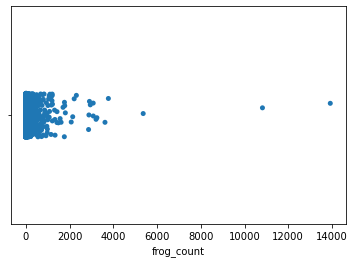

In [91]:
# Visulalisation for selecting the frog count
import seaborn as sns
sns.stripplot(merged_df_final['frog_count'])

In [92]:
merged_df_final.to_csv('Frog_Orccurence_Merged.csv')